<a href="https://colab.research.google.com/github/LocalPiper/statistics/blob/master/MSLab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
x = [
        1.0,
        1.1,
        1.2,
        1.3,
        1.4,
        1.5,
        1.6,
        1.7,
        1.8,
        1.9,
        2.0,
        2.1,
        2.2,
        2.3,
        2.4,
        2.5,
        2.6,
        2.7,
        2.8,
        2.9
    ]
t = [
        2.0,
        1.8,
        1.6,
        1.6,
        1.4,
        1.0,
        1.1,
        1.0,
        1.1,
        1.0,
        1.1,
        1.0,
        1.1,
        1.1,
        1.1,
        1.2,
        1.4,
        1.3,
        1.7,
        1.9
]

Матрица плана: 
[[1.   1.   1.  ]
 [1.   1.1  1.21]
 [1.   1.2  1.44]
 [1.   1.3  1.69]
 [1.   1.4  1.96]
 [1.   1.5  2.25]
 [1.   1.6  2.56]
 [1.   1.7  2.89]
 [1.   1.8  3.24]
 [1.   1.9  3.61]
 [1.   2.   4.  ]
 [1.   2.1  4.41]
 [1.   2.2  4.84]
 [1.   2.3  5.29]
 [1.   2.4  5.76]
 [1.   2.5  6.25]
 [1.   2.6  6.76]
 [1.   2.7  7.29]
 [1.   2.8  7.84]
 [1.   2.9  8.41]]
Полученные коэффициенты:
[5.056275917065565, -4.088824333561355, 1.0258601048075104]
Значение MSE: 0.007923177261335127
Значение RMSE: 0.08901223096482375


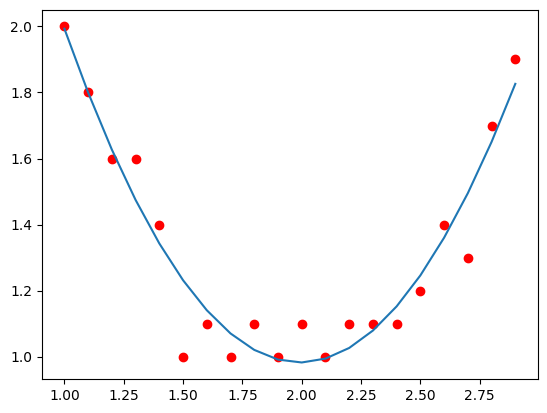

In [ ]:
def mult(A, B):
    if len(A[0]) != len(B):
        raise ValueError("Invalid matrix dimensions")

    result = [[0 for j in range(len(B[0]))] for i in range(len(A))]
    def multiply(A, B, result, i, j, k):
        if i >= len(A):
            return
        if j >= len(B[0]):
            return multiply(A, B, result, i+1, 0, 0)
        if k >= len(B):
            return multiply(A, B, result, i, j+1, 0)
        result[i][j] += A[i][k] * B[k][j]
        multiply(A, B, result, i, j, k+1)

    multiply(A, B, result, 0, 0, 0)
    return result


import numpy as np
def backward(a):
  # det = a[0][0]*a[1][1]*a[2][2]+a[0][1]*a[1][2]*a[2][0]+a[0][2]*a[1][0]*a[2][1]- a[2][0]*a[1][1]*a[0][2]-a[2][1]*a[1][2]*a[0][0]-a[2][2]*a[1][0]*a[0][1]
  b = np.linalg.inv(a)
  return b

matrix = []
for i in range(len(x)):
  row = []
  for j in range(3):
    row.append(pow(x[i], j))
  matrix.append(row)

print("Матрица плана: " )

print(np.array(matrix))

transposed_matrix = [[0 for j in range(len(matrix))] for i in range(len(matrix[0]))]


for i in range(len(matrix)):
  for j in range(len(matrix[0])):
    transposed_matrix[j][i] = matrix[i][j]

A = mult(transposed_matrix, matrix)
B = backward(A)
C = mult(B, transposed_matrix)

D = []

for i in range(len(C)):
  sum = 0
  for j in range(len(t)):
    sum += C[i][j] * t[j]
  D.append(sum)

print("Полученные коэффициенты:")
print(D)

def f(D, xi):
  return D[0] + D[1] * xi + D[2] * xi * xi

import matplotlib.pyplot as plt

y = []
for i in range(len(x)):
  y.append(f(D, x[i]))


plt.plot(x, y)
plt.scatter(x, t, color='red')


n = len(x)
sum = 0
for i in range(n):
  sum += pow(t[i] - y[i], 2)

MSE = 1/n * sum
RMSE = np.sqrt(MSE)
print("Значение MSE: " + str(MSE))
print("Значение RMSE: " + str(RMSE))